# In-Class Programming—Plotly

# 911-call activity

This data is from Montgomery County, Pennsylvania, and available via [Kaggle](https://www.kaggle.com/datasets/mchirico/montcoalert/data).

In this kernel, we will Analyze and Visualize the 911 calls data based on different variables.

In [4]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import datetime as dt
import zipfile

In [5]:
with zipfile.ZipFile("911.zip","r") as zip_ref:
    zip_ref.extractall(".")

In [7]:
data = pd.read_csv('911.csv')
data

lat        lng  \
0       40.297876 -75.581294   
1       40.258061 -75.264680   
2       40.121182 -75.351975   
3       40.116153 -75.343513   
4       40.251492 -75.603350   
...           ...        ...   
663517  40.157956 -75.348060   
663518  40.136306 -75.428697   
663519  40.013779 -75.300835   
663520  40.121603 -75.351437   
663521  40.015046 -75.299674   

                                                     desc      zip  \
0       REINDEER CT & DEAD END;  NEW HANOVER; Station ...  19525.0   
1       BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...  19446.0   
2       HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...  19401.0   
3       AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...  19401.0   
4       CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...      NaN   
...                                                   ...      ...   
663517  SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...  19403.0   
663518  EAGLEVILLE RD & BUNTING CIR;  LOWER PROVIDENCE...  19403.0   
663519  HAVERFORD STATION RD;  LOWER MERION; Station 3...  19041.0   
663520  MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...  19401.0   
663521  HAVERFORD STATION RD & W MONTGOMERY AVE; LOWER...  19041.0   

                              title            timeStamp                twp  \
0            EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1           EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2               Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3            EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4                    EMS: DIZZINESS  2015-12-10 16:56:52   LOWER POTTSGROVE   
...                             ...                  ...                ...   
663517  Traffic: VEHICLE ACCIDENT -  2020-07-29 15:46:51      EAST NORRITON   
663518        EMS: GENERAL WEAKNESS  2020-07-29 15:52:19   LOWER PROVIDENCE   
663519        EMS: VEHICLE ACCIDENT  2020-07-29 15:52:52       LOWER MERION   
663520          Fire: BUILDING FIRE  2020-07-29 15:54:08         NORRISTOWN   
663521  Traffic: VEHICLE ACCIDENT -  2020-07-29 15:52:46       LOWER MERION   

                                           addr  e  
0                        REINDEER CT & DEAD END  1  
1                    BRIAR PATH & WHITEMARSH LN  1  
2                                      HAWS AVE  1  
3                            AIRY ST & SWEDE ST  1  
4                      CHERRYWOOD CT & DEAD END  1  
...                                         ... ..  
663517                SUNSET AVE & WOODLAND AVE  1  
663518              EAGLEVILLE RD & BUNTING CIR  1  
663519                     HAVERFORD STATION RD  1  
663520                   MARSHALL ST & HAWS AVE  1  
663521  HAVERFORD STATION RD & W MONTGOMERY AVE  1  

[663522 rows x 9 columns]

In [8]:
data.isnull().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

Lets leave zip for now we will only use it for the top 10 zip codes for most number of 911 calls.

First, let's drop null townships.

In [9]:
data.dropna(subset=['twp'], inplace=True)

In [10]:
data.isnull().sum()

lat              0
lng              0
desc             0
zip          80030
title            0
timeStamp        0
twp              0
addr             0
e                0
dtype: int64

In [11]:
data['timeStamp'].head(3)

0    2015-12-10 17:10:52
1    2015-12-10 17:29:21
2    2015-12-10 14:39:21
Name: timeStamp, dtype: object

Our column 'timeStamp' is in string format and hence we must convert it to 'Datetime' format.

In [12]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])

In [13]:
data['timeStamp'].head(3)

0   2015-12-10 17:10:52
1   2015-12-10 17:29:21
2   2015-12-10 14:39:21
Name: timeStamp, dtype: datetime64[ns]

In [14]:
data['year'] = data['timeStamp'].dt.year

Adding one column to our data : 'reason_cat' for the category of reason. This will enable us to better understand and visualize the dataset.

In [15]:
data['reason_cat'] = data['title'].apply(lambda x: x.split(':')[0])
data['reason_cat'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

#### Different Reasons to call 911?

In [16]:
reason = data.groupby(['reason_cat']).size().reset_index()
reason.columns = ['reason', 'count']
reason

reason   count
0      EMS  332480
1     Fire  100545
2  Traffic  230204

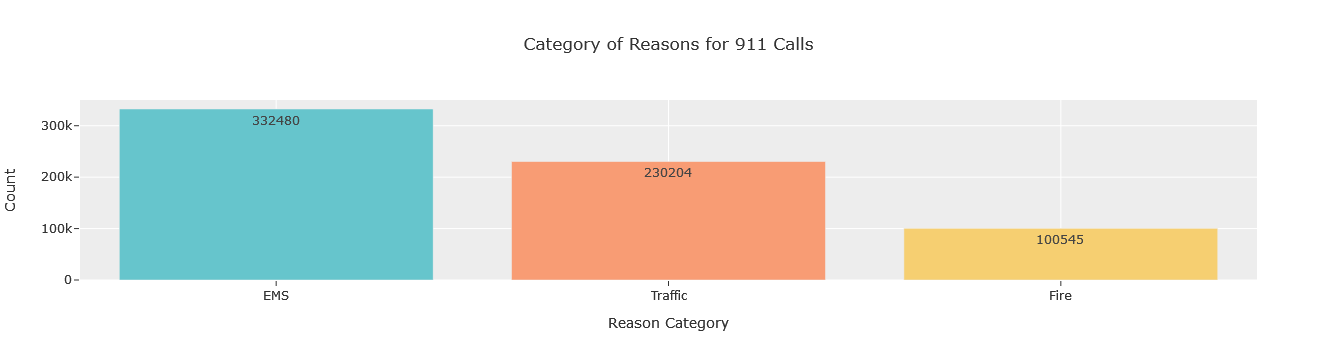

In [17]:
# Bar Chart
fig1 = px.bar(
    reason,
    x='reason',
    y='count',
    color_discrete_sequence=[px.colors.qualitative.Pastel],
    text='count',
    title='Category of Reasons for 911 Calls'
)

fig1.update_layout(
    xaxis_title='Reason Category',
    xaxis={'categoryorder':'total descending'},
    yaxis_title='Count',
    showlegend=False,
    template='ggplot2')

fig1.show()

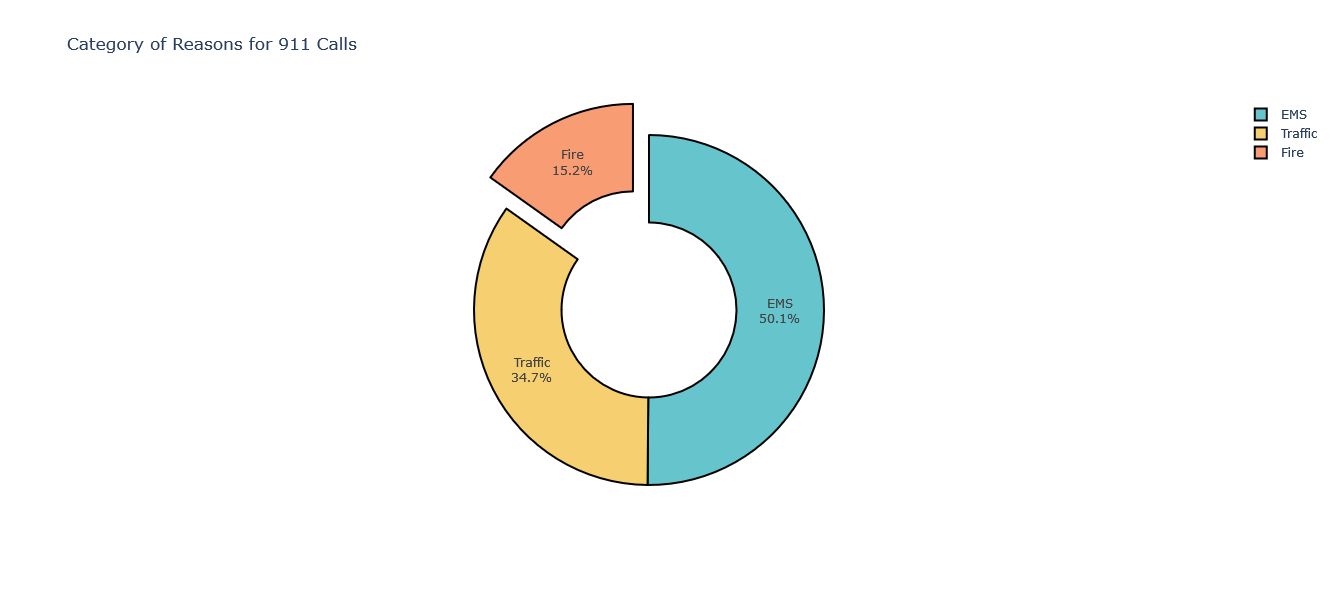

In [18]:
# Pie Chart
fig2 = px.pie(
    reason, 
    values='count',
    names='reason',
    title='Category of Reasons for 911 Calls',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    hole=0.5,
    height=600
)

fig2.update_traces(
    sort=True,
    direction='clockwise',
    textinfo='percent+label', pull=[0, .2, 0])

fig2.data[0].marker.line.width = 2
fig2.data[0].marker.line.color = "black"

fig2.show()

EMS (Emergency Medical Services) calls are the most frequent.
Traffic calls are less frequent and Fire calls being the least frequent.

#### let us look top 10 reasons to call 911

In [19]:
top_10_reasons = data['title'].value_counts().to_frame(name='count').head(10).sort_values(by='count')
top_10_reasons

count
title                              
EMS: HEAD INJURY              18298
EMS: SUBJECT IN PAIN          19640
Traffic: ROAD OBSTRUCTION -   23235
EMS: VEHICLE ACCIDENT         25462
EMS: CARDIAC EMERGENCY        32322
EMS: RESPIRATORY EMERGENCY    34239
EMS: FALL VICTIM              34668
Fire: FIRE ALARM              38328
Traffic: DISABLED VEHICLE -   47907
Traffic: VEHICLE ACCIDENT -  148371

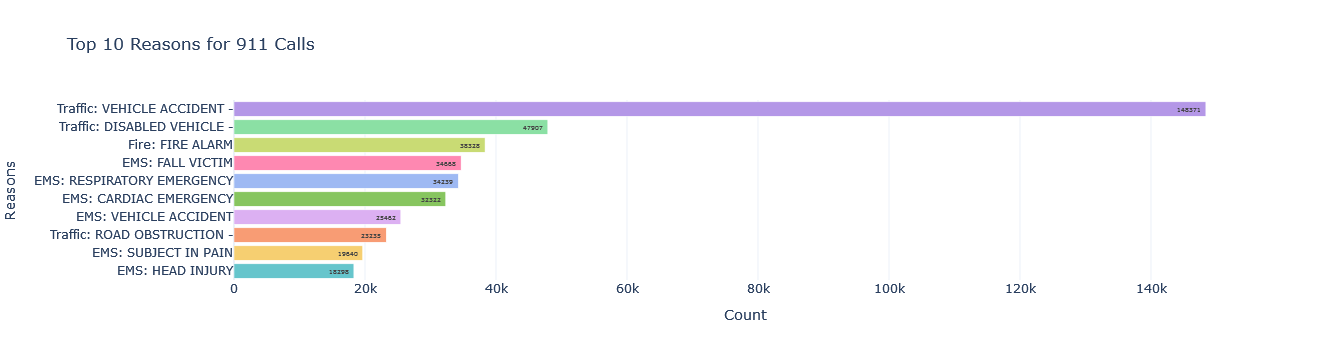

In [20]:
fig3 = px.bar(
    top_10_reasons,
    x='count',
    color_discrete_sequence=[px.colors.qualitative.Pastel],
    orientation='h',
    text='count',
    title='Top 10 Reasons for 911 Calls'
)

fig3.update_layout(
    xaxis_title='Count',
    yaxis_title='Reasons',
    template='plotly_white'
)

fig3.show()

Approximately 28% of all calls are for vehicle accidents.
Followed by disabled vehicle calls which constitutes nearly 7% of all calls.

### Top 10 townships from 2015-2020 for 911 calls

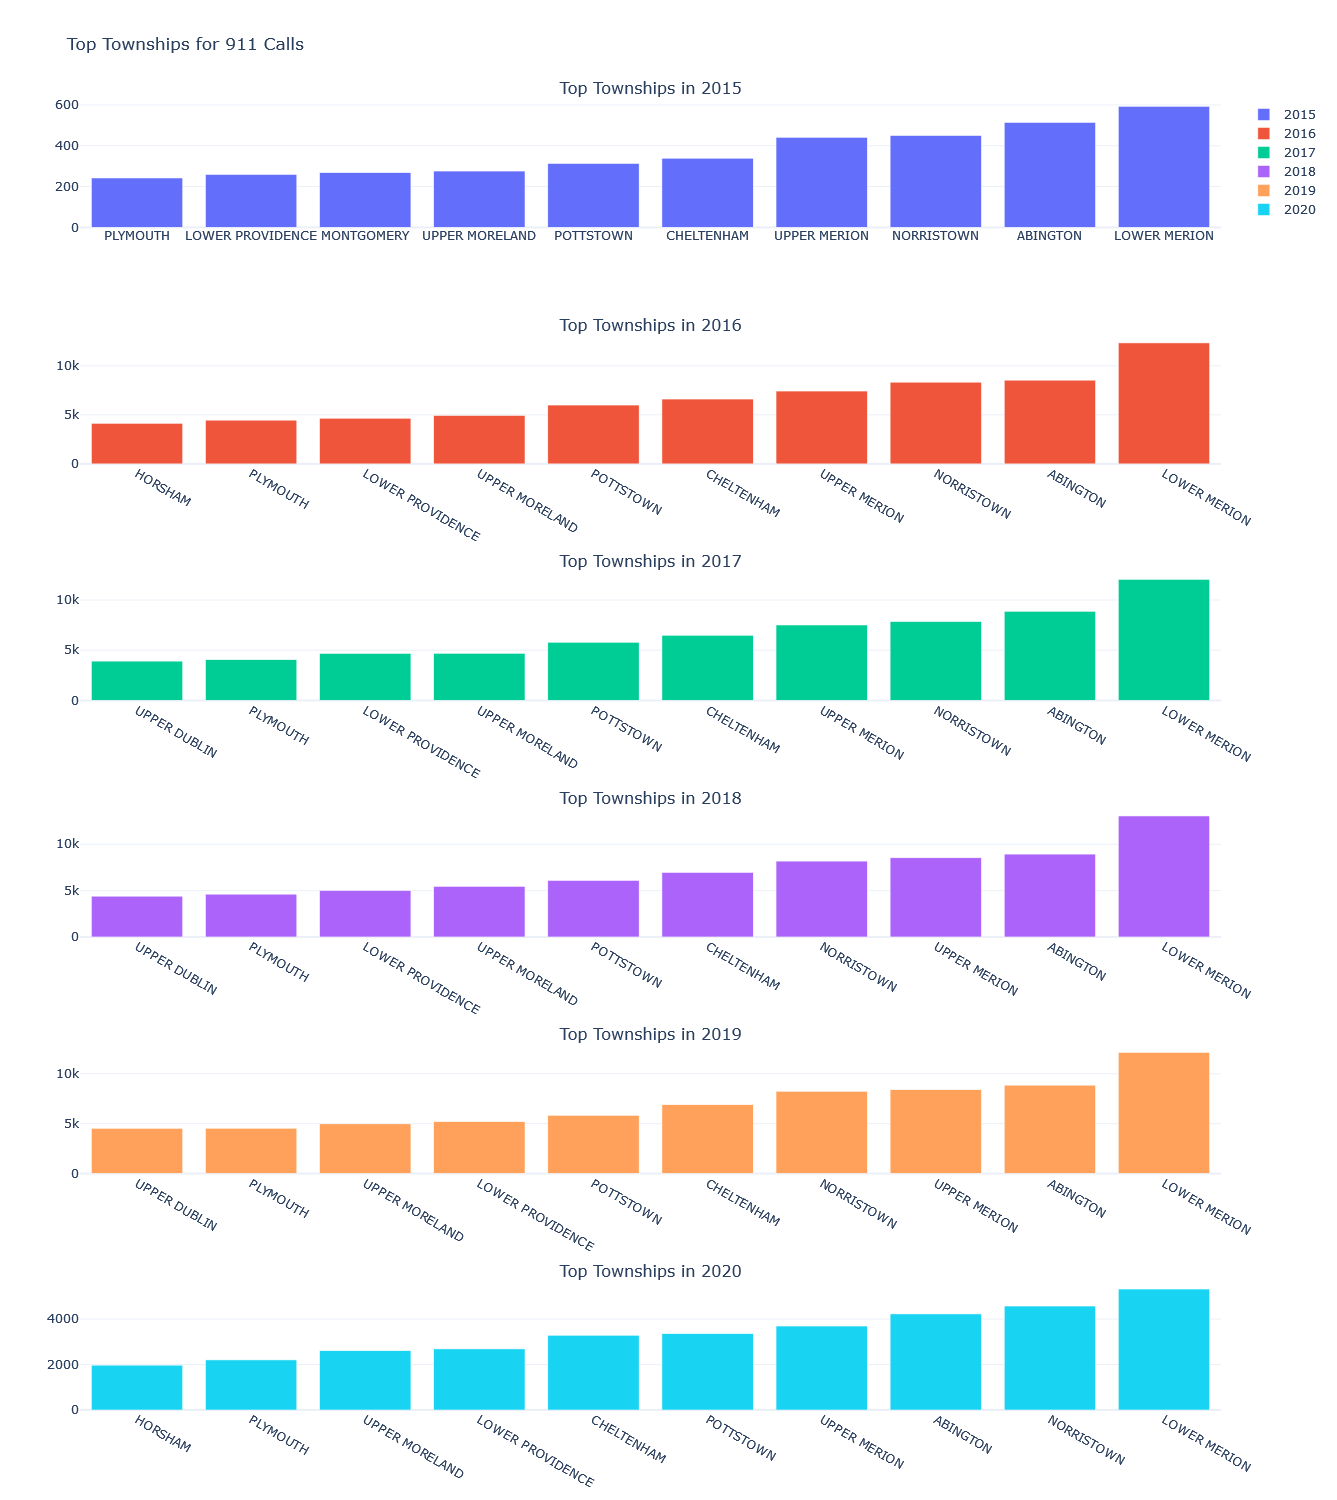

In [21]:
years = range(2015, 2021)
titles = ['Top Townships in ' + str(year) for year in years]

fig4 = make_subplots(
    rows=len(years),
    cols=1,
    subplot_titles=(titles))

r = 0
for year in range(2015, 2021):
    r = r+1    
    year_data = data[data['year']==year]
    year_data_twp = year_data['twp'].value_counts().to_frame()
    top_sorted_twp = year_data_twp.head(10).sort_values(by='count')    
    fig4.add_trace(go.Bar(x=top_sorted_twp.index, y=top_sorted_twp['count'], name=year), row=r, col=1)

fig4.update_layout(title_text='Top Townships for 911 Calls', height=1500, template='plotly_white')

fig4.show()

# Unemployment world-wide

[Data](https://www.kaggle.com/datasets/sovannt/world-bank-youth-unemployment/data) and [example code](https://www.kaggle.com/code/arthurtok/generation-unemployed-interactive-plotly-visuals) from Kaggle.

In [22]:
country = pd.read_csv('API_ILO_country_YU.csv')
country.head()

Country Name Country Code       2010       2011       2012  \
0           Afghanistan          AFG  20.600000  20.900000  19.700001   
1                Angola          AGO  10.800000  10.700000  10.700000   
2               Albania          ALB  25.799999  27.000000  28.299999   
3            Arab World          ARB  25.022214  28.117516  29.113212   
4  United Arab Emirates          ARE   9.800000   9.800000   9.800000   

        2013       2014  
0  21.100000  20.799999  
1  10.600000  10.500000  
2  28.700001  29.200001  
3  29.335306  29.704569  
4   9.900000  10.000000

In [23]:
country['change'] = country['2014'] - country['2010']
country

Country Name Country Code       2010       2011       2012  \
0             Afghanistan          AFG  20.600000  20.900000  19.700001   
1                  Angola          AGO  10.800000  10.700000  10.700000   
2                 Albania          ALB  25.799999  27.000000  28.299999   
3              Arab World          ARB  25.022214  28.117516  29.113212   
4    United Arab Emirates          ARE   9.800000   9.800000   9.800000   
..                    ...          ...        ...        ...        ...   
214           Yemen, Rep.          YEM  30.299999  30.000000  30.200001   
215          South Africa          ZAF  50.799999  50.099998  52.200001   
216      Congo, Dem. Rep.          COD  12.300000  12.300000  12.300000   
217                Zambia          ZMB  26.400000  26.600000  26.600000   
218              Zimbabwe          ZWE   9.600000   8.300000   8.300000   

          2013       2014    change  
0    21.100000  20.799999  0.199999  
1    10.600000  10.500000 -0.300000  
2    28.700001  29.200001  3.400002  
3    29.335306  29.704569  4.682355  
4     9.900000  10.000000  0.200000  
..         ...        ...       ...  
214  30.200001  29.900000 -0.400000  
215  51.400002  52.599998  1.799999  
216  12.200000  11.900000 -0.400001  
217  25.500000  25.100000 -1.299999  
218   8.900000   9.400000 -0.200001  

[219 rows x 8 columns]

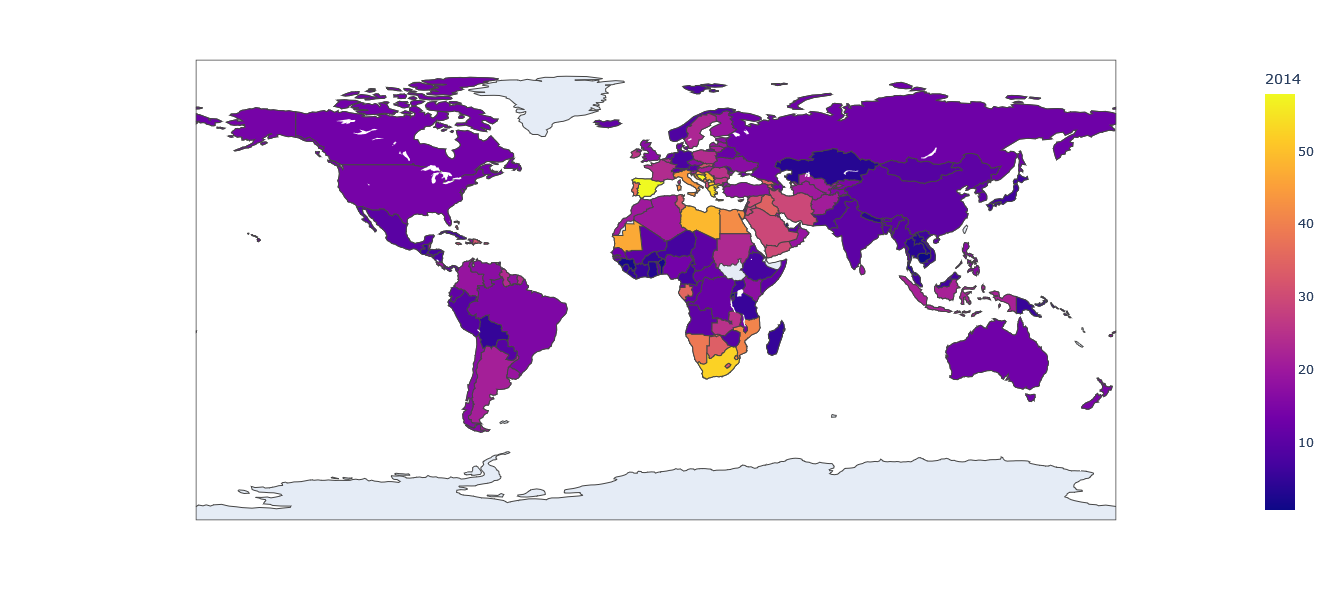

In [24]:
px.choropleth(
    country,
    locations='Country Code',
    color='2014',
    hover_name='Country Name',
    height = 600
).show()

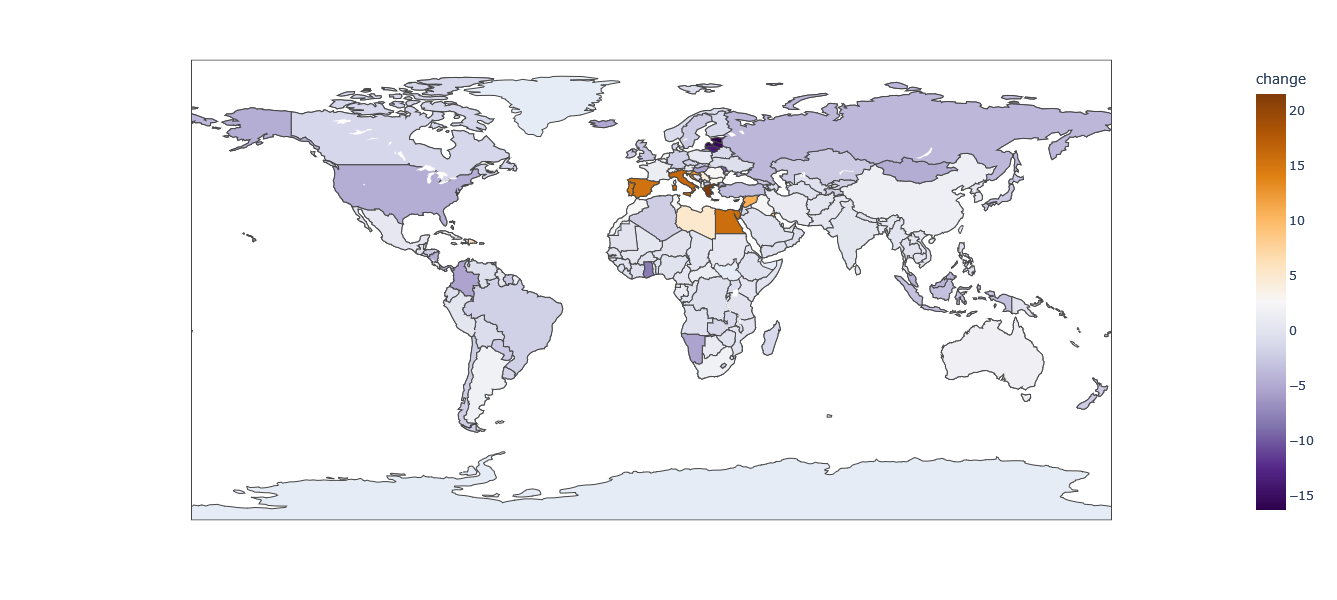

In [25]:
fig = px.choropleth(
    country,
    locations='Country Code',
    color='change',
    hover_name='Country Name',
    color_continuous_scale=px.colors.diverging.PuOr_r,
    height = 600
).show()

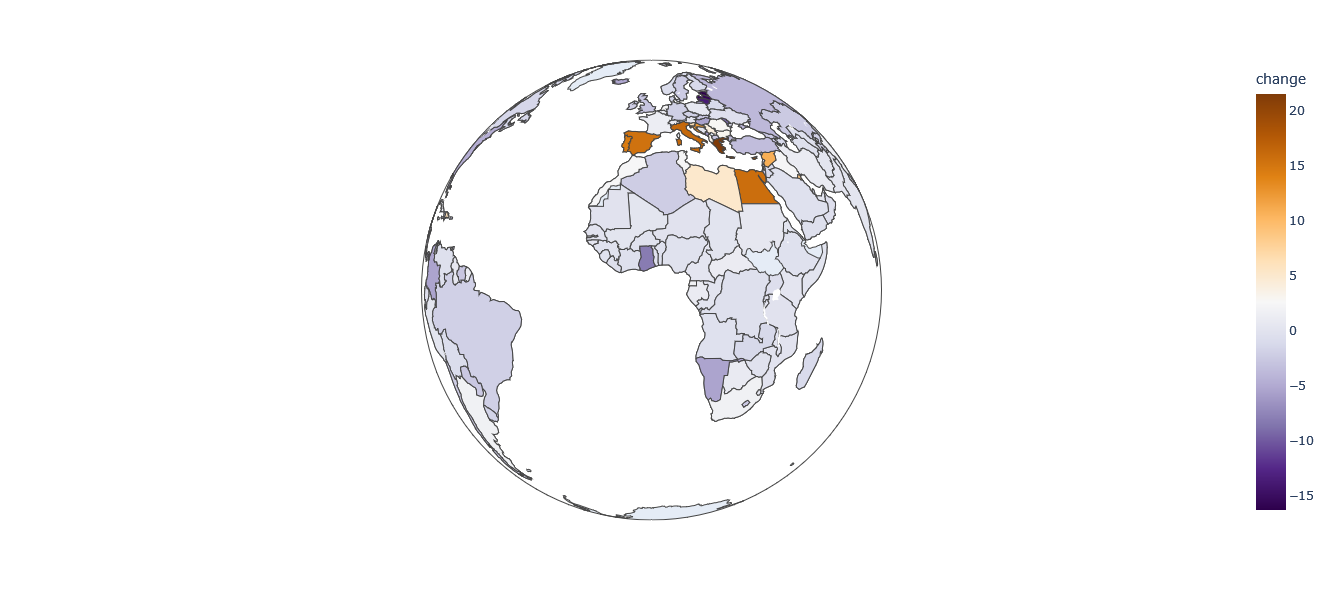

In [26]:
px.choropleth(
    country,
    locations='Country Code',
    color='change',
    hover_name='Country Name',
    color_continuous_scale=px.colors.diverging.PuOr_r,
    height = 600,
    projection = 'orthographic'
).show()

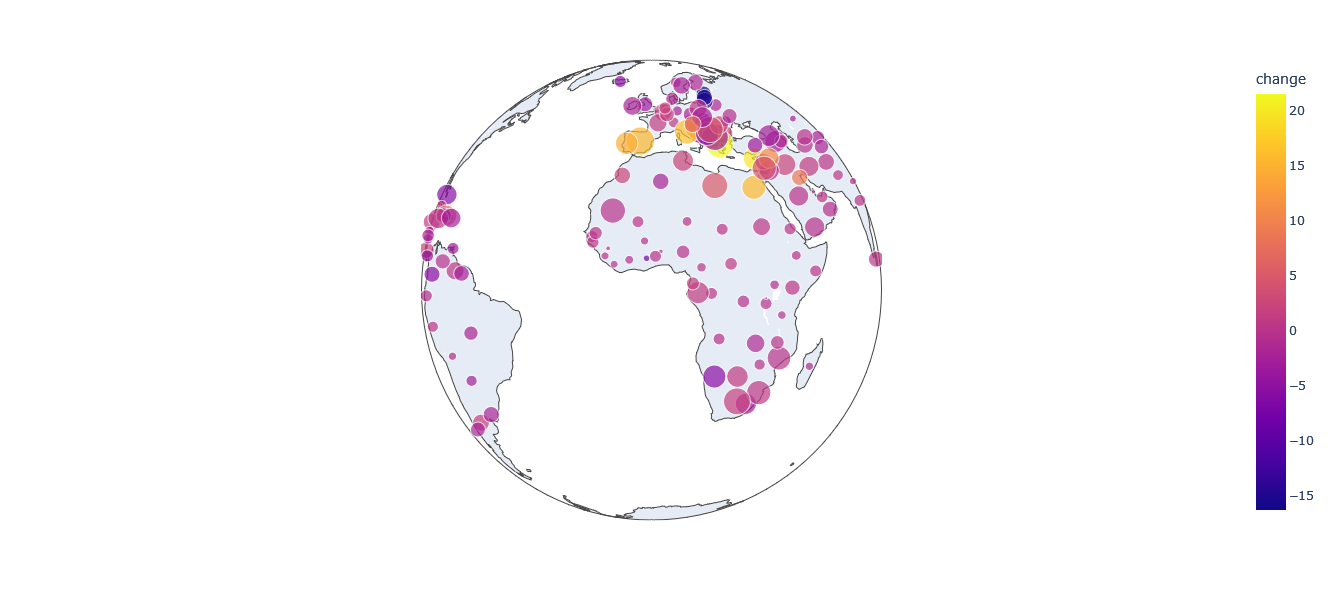

In [27]:
px.scatter_geo(
    country,
    locations='Country Code',
    color='change',
    hover_name='Country Name',
    size='2014',
    height = 600,
        projection = 'orthographic'

).show()